<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inhaltliche-Punkte" data-toc-modified-id="Inhaltliche-Punkte-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inhaltliche Punkte</a></span></li><li><span><a href="#Efficacy:-Reading-and-converting" data-toc-modified-id="Efficacy:-Reading-and-converting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Efficacy: Reading and converting</a></span></li><li><span><a href="#Data-exploration:-gender,-age" data-toc-modified-id="Data-exploration:-gender,-age-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data exploration: gender, age</a></span></li><li><span><a href="#Efficacy:-T-Test-by-gender" data-toc-modified-id="Efficacy:-T-Test-by-gender-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Efficacy: T-Test by gender</a></span></li><li><span><a href="#Lineare-Regression-(step-by-step)" data-toc-modified-id="Lineare-Regression-(step-by-step)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Lineare Regression (step by step)</a></span></li><li><span><a href="#Lineare-Regression-per-sns-(self-efficacy)" data-toc-modified-id="Lineare-Regression-per-sns-(self-efficacy)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Lineare Regression per sns (self-efficacy)</a></span></li><li><span><a href="#Creativity:-reading" data-toc-modified-id="Creativity:-reading-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Creativity: reading</a></span></li></ul></div>

## Inhaltliche Punkte 


775 entries 
p. 12 989

type of graphics 

type of groups to be compared 
- pre vs post for all 
- e.g. age groups 
- gender groups 
- age and gender ? 
- 

interpretations

In [1]:
## Import the packages
import numpy as np
from scipy import stats
import pandas as pd
import pingouin as pg
import seaborn as sns

## Efficacy: Reading and converting 

In [63]:
# datae - efficacy data 
# datac - creativity data 
# print 4 example lines 
i=0
datae = pd.read_csv('data/self-efficacy_file.csv', sep=';')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(datae[:4])
len(datae)

776

In [97]:
# check data types of all 94 columns 
for i, t in enumerate(datae.dtypes): 
    print (i,datae.columns[i], t)
    #if i>10: break

0 Phase int64
1 ID object
2 Partner int64
3 InSchool int64
4 Gender object
5 Action int64
6 Disability int64
7 ProfMother object
8 ProfFather object
9 Age object
10 AgeGroup object
11 AttendHours object
12 HoursPlanned object
13 RelAttend object
14 FacAge object
15 FacGender object
16 FacFemRatio object
17 FacMalRatio object
18 PartcFacRatio object
19 FacConstancy object
20 PreQ1 int64
21 PreQ2 int64
22 PreQ3 int64
23 PreQ4 int64
24 PreQ5 int64
25 PreQ6 int64
26 PreQ7 int64
27 PreQ8 object
28 PreQ9 int64
29 PreQ10 int64
30 PreQ11 int64
31 PreQ12 int64
32 PreQ13 int64
33 PreQ14 object
34 PreQ15 int64
35 PreQ16 int64
36 PreSelf1 object
37 PreSelf2 object
38 PreSelf3 int64
39 PreQSum object
40 PostQ1 object
41 PostQ2 int64
42 PostQ3 int64
43 PostQ4 int64
44 PostQ5 int64
45 PostQ6 int64
46 PostQ7 int64
47 PostQ8 object
48 PostQ9 int64
49 PostQ10 int64
50 PostQ11 int64
51 PostQ12 int64
52 PostQ13 int64
53 PostQ14 int64
54 PostQ15 int64
55 PostQ16 int64
56 PostSelf1 int64
57 PostSelf2 object

In [70]:
datae_sub = datae.loc[:,['Gender','Age','AgeGroup','PreQSum','PostQSum','Partner']]
datae_sub.tail(3)

,Gender,Age,AgeGroup,PreQSum,PostQSum,Partner
773,1,10,1,73,75,4
774,1,8,1,73,75,9
775,1,12,2,74,75,3


In [109]:
datae_sub = datae_sub.apply(pd.to_numeric,errors='coerce')
datae_sub.dtypes

Gender      float64
Age         float64
AgeGroup    float64
PreQSum     float64
PostQSum    float64
Partner       int64
dtype: object

In [110]:
datae_sub = datae_sub[(datae_sub['PreQSum'] < 76) & (datae_sub['PostQSum'] < 76)]
datae_sub.head(4)
# take care of PostQSum => 748

,Gender,Age,AgeGroup,PreQSum,PostQSum,Partner
26,1.0,8.0,1.0,52.0,31.0,2
27,0.0,12.0,2.0,37.0,32.0,3
28,0.0,8.0,1.0,40.0,32.0,3
29,1.0,12.0,2.0,43.0,33.0,5


<AxesSubplot:>

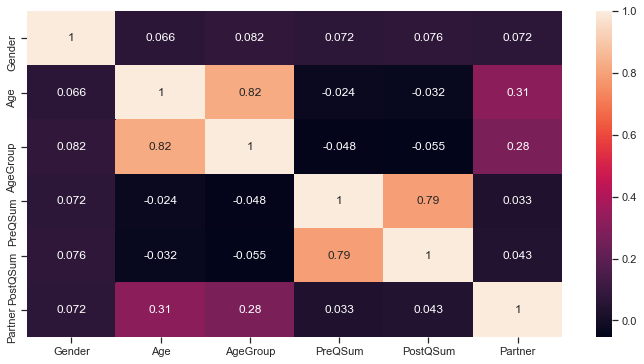

In [73]:
correlations = datae_sub.corr()
sns.heatmap(correlations, annot=True)

<AxesSubplot:>

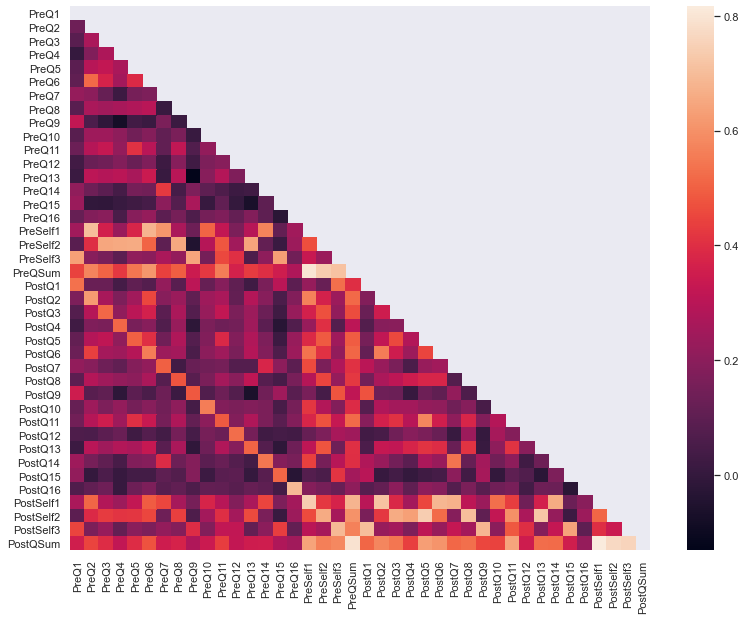

In [126]:
sns.set(rc={'figure.figsize':(13,10)})
datae_quest = datae.iloc[:,20:60]
datae_quest = datae_quest.apply(pd.to_numeric,errors='coerce')

correlations = datae_quest.corr()


mask = np.zeros(correlations.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

sns.heatmap(correlations, annot=False, mask = mask)

## Data exploration: gender, age 

Gender
f    347
m    400
dtype: int64


<AxesSubplot:ylabel='None'>

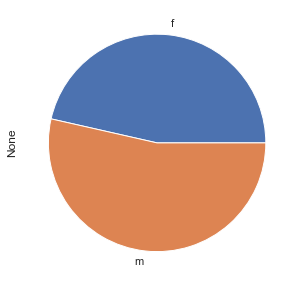

In [129]:
sns.set(rc={'figure.figsize':(5,5)})
# female = '0'
datae_sub [['Gender']] = datae_sub [['Gender']].replace({0.0:'f', 1.0:'m'})
print(datae_sub [['Gender']].groupby(['Gender']).size())
datae_sub [['Gender']].groupby(['Gender']).size().plot.pie()

<AxesSubplot:title={'center':'age distribution, efficacy data '}, xlabel='Age'>

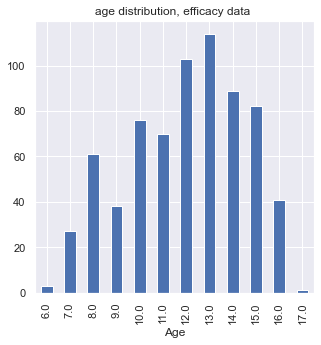

In [130]:
# all have age 
datae_sub [['Age']].groupby(['Age']).size().plot.bar(title='age distribution, efficacy data ')

In [131]:
# using two age categories 
# 6-10
# 11-16

datae_sub [['AgeGroup']].groupby(['AgeGroup']).size()

AgeGroup
1.0    205
2.0    530
dtype: int64

In [132]:
# see non-null count for 'age' and 'age group' 
datae_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 26 to 775
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    747 non-null    object 
 1   Age       705 non-null    float64
 2   AgeGroup  735 non-null    float64
 3   PreQSum   748 non-null    float64
 4   PostQSum  748 non-null    float64
 5   Partner   748 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 40.9+ KB


## Efficacy: T-Test by gender

In [133]:
datae_sub = datae.loc[:,['Gender','Age','AgeGroup','PreQSum','PostQSum','Partner']]
partner_dummies = pd.get_dummies(data=datae_sub['Partner'], columns=['Partner'], drop_first=True)
datae_sub = pd.concat([datae_sub, partner_dummies], axis=1)
datae_sub.tail(3)

,Gender,Age,AgeGroup,PreQSum,PostQSum,Partner,2,3,4,5,6,7,8,9,10,11
773,1,10,1,73,75,4,0,0,1,0,0,0,0,0,0,0
774,1,8,1,73,75,9,0,0,0,0,0,0,0,1,0,0
775,1,12,2,74,75,3,0,1,0,0,0,0,0,0,0,0


In [29]:
# pre mean = 54,87  
# post mean = 55,56

datae_pre = datae_sub.PreQSum 
datae_pos = datae_sub.PostQSum

datae_gen = datae_sub.Gender

meane_pre = datae_pre.mean()
meane_pos = datae_pos.mean()
print('\n Pre Mean: ',meane_pre,'\n Post Mean: ',meane_pos)

datae_pos.describe()


 Pre Mean:  54.86497326203209 
 Post Mean:  55.54679144385027


count    748.000000
mean      55.546791
std        7.824836
min       31.000000
25%       50.000000
50%       55.000000
75%       61.000000
max       75.000000
Name: PostQSum, dtype: float64

In [30]:
# zentrale Tendenz (hier arithm. Mittel) 
# CI confidence intervall (1 standardabweichung = 68%); entspricht standard- oder stichprobenfehler
# CI = 95  (zwei Standardabweichung),d.h. 95% aller Werte liegen innerhalb des roten Bandes 


## Lineare Regression (step by step) 

In [148]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

N = len(datae_pre)
x_mean = datae_pre.mean()
y_mean = datae_pos.mean()

B1_num = ((datae_pre - x_mean) * (datae_pos - y_mean)).sum()
B1_den = ((datae_pre - x_mean)**2).sum()
B1 = B1_num / B1_den

B0 = y_mean - (B1 * x_mean)

B0, B1, reg_line = linear_regression(datae_pre, datae_pos)
print('Regression Line: ', reg_line)
R = corr_coef(datae_pre, datae_pos)
print('Correlation Coef., R: ', R)
print('"Goodness of Fit, R-Square": ', R**2)

Regression Line:  y = 8.198293592169279 + 0.863β
Correlation Coef., R:  0.7934809744530293
"Goodness of Fit, R-Square":  0.629612056818929


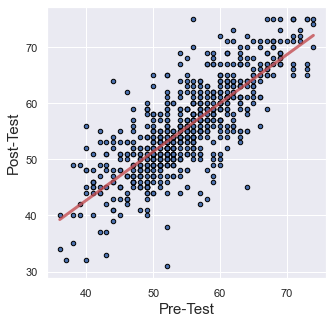

In [150]:
import matplotlib.pyplot as plt
plt.scatter(datae_pre, datae_pos, s=20, linewidths=1, edgecolor='black')
plt.xlabel('Pre-Test', fontsize=15)
plt.ylabel('Post-Test', fontsize=15)
plt.plot(datae_pre, B0 + B1*datae_pre, c = 'r', linewidth=3, alpha=.8, solid_capstyle='round')
#plt.scatter(x=datae_pre.mean(), y=datae_pos.mean(), marker='*', s=10**2.5, c='r') 
# average point

## Lineare Regression per sns (self-efficacy)


In [34]:

datae_sub.loc[[0,1,2,3,4,5,6],['PreQSum','PostQSum']]
# https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/index.html 

,PreQSum,PostQSum
0,36.0,34.0
1,36.0,40.0
2,37.0,32.0
3,38.0,35.0
4,38.0,49.0
5,38.0,40.0
6,39.0,49.0


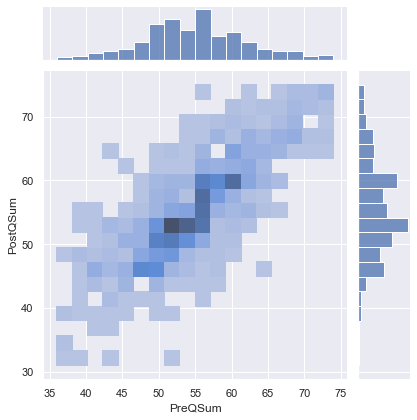

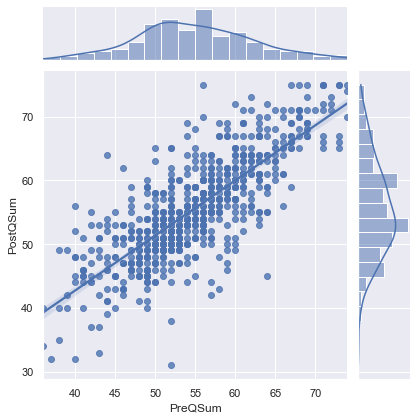

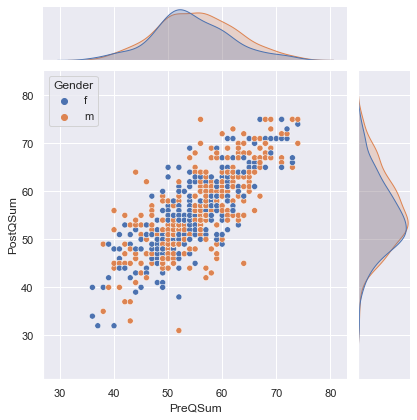

In [137]:
sns.jointplot(x=datae_pre,y=datae_pos, kind='hist')
sns.jointplot(x=datae_pre,y=datae_pos, kind='reg')
sns.jointplot(x=datae_pre,y=datae_pos, kind='scatter', color = 'red', hue = datae_gen)

In [ ]:
# By default, the plot aggregates over multiple y values at each value of x and shows an estimate of the central tendency and a confidence interval for that estimate.
sns.lineplot (x=pre,y=post, color = 'red')

In [ ]:
data['change']=post - pre
data.change.mean()

In [ ]:
ge = sns.set(rc={'figure.figsize':(6,6)})
ge = sns.set_style('ticks')
ge = sns.histplot(data.change,kde=False)
ge.set_yticklabels(ge.get_yticks(), size = 20)
ge.set_xticklabels(ge.get_xticks(), size = 20)


In [ ]:
# 
pg.ttest(data.change, y=0).round(3)

In [ ]:
# paired 2 group test 
pg.ttest(x=pre, y=post, paired=True).round(2)

In [ ]:
W, p=stats.shapiro(x=data.change)

print(f"The value of W is {W}, p={p}")

In [ ]:
sns.histplot(pre,kde=False)

## Creativity: reading 

In [ ]:
i=0
datac = pd.read_csv('data/creativity.csv', sep=';')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data[:4])
    print (i,data.dtypes)
    i+=1
len(data)

In [ ]:
pre_c = pd.to_numeric(data.PreTSDSummZf, errors='coerce')
post_c = pd.to_numeric(data.PostTSDSummZf, errors='coerce')
mean_pre_c = pre_c.mean()
mean_post_c = post_c.mean()
print('\n',mean_pre_c,'\n',mean_post_c)

#data_c ['PreTSDSummZf'] = pd.to_numeric(data_c['PreTSDSummZf'])


In [ ]:
data['change_c']=post_c - pre_c
data.change_c.mean()

In [ ]:
gch = sns.set(rc={'figure.figsize':(6,6)})
gch = sns.set_style('ticks')
gch = sns.histplot(data.change_c,kde=False)
gch.set_yticklabels(gch.get_yticks(), size = 20)
gch.set_xticklabels(gch.get_xticks(), size = 20)

In [ ]:
# test auf normalverteilung 
W, p=stats.shapiro(x=data.change_c)
p = round(p, 2)

print(f"The value of W is {W}, p={p}")

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style('ticks')
gc = sns.scatterplot(x=pre_c,y=post_c, s = 20, hue = gender)
gc = sns.lineplot (x=pre_c,y=post_c, ci=None, color='darkred') 
#gc = sns.lineplot (x=pre_c,y=post_c, ci=95, color='darkred') 
gc.set_yticklabels(gc.get_yticks(), size = 15)
gc.set_xticklabels(gc.get_xticks(), size = 15)

In [ ]:
pg.ttest(x=post_c, y=pre_c, paired=True).round(2)

In [ ]:
def mean_confidence_interval(change_c, confidence=0.95):
    a = change_c
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return pd.DataFrame({"mean":[m], "lower 95CI": [m-h], "upper 95CI":[m+h]})

mean_confidence_interval(data.change_c).round(2)

In [ ]:
professions = data.ProfMother[data.ProfMother != ' ']
professions

In [ ]:
# age needs inspection  
age = data.Age[data.Age != ' ']
age = pd.to_numeric(age)
print(age.mean(),'\n',age.min(), '\n',age.max())
len (age)

In [ ]:

ga = sns.set(rc={'figure.figsize':(6,6)})
ga = sns.set_style('ticks')
ga = sns.histplot(age,kde=False, binrange = (6,18), binwidth= 0.5, discrete=True)
ga.set_yticklabels(ga.get_yticks(), size = 15)
ga.set_xticklabels(ga.get_xticks(), size = 15)